In [3]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium 
# from folium import plugins
plt.rcParams['figure.figsize'] = 15, 8
# import warnings
# warnings.filterwarnings('ignore')

In [71]:
import plotly.express as px

In [4]:
df= pd.read_excel(r'C:\Users\BI121\Downloads\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\Covid cases in India.xlsx')
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,156,1,6,46
3,4,Gujarat,272,0,0,95
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,592,0,0,80
9,10,Maharashtra,221,3,15,251


In [5]:

df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']
total_cases=df['Total cases'].sum()
print('The total number of cases till now in India is',total_cases)

The total number of cases till now in India is 1801


In [82]:
India_coord = pd.read_excel(r'C:\Users\BI121\Downloads\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\Indian Coordinates.xlsx')
dbd_India = pd.read_excel(r'C:\Users\BI121\Downloads\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\per_day_cases.xlsx',parse_dates=True, sheet_name="India")
dbd_Italy = pd.read_excel(r'C:\Users\BI121\Downloads\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel(r'C:\Users\BI121\Downloads\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel(r'C:\Users\BI121\Downloads\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

# Total india cases

In [57]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,156,1,6,46,157
3,Gujarat,272,0,0,95,272
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,592,0,0,80,592
9,Maharashtra,221,3,15,251,224


In [58]:
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 1256


,Total Active
Name of State / UT,
Madhya Pradesh,512
Gujarat,177
Kerala,127
Delhi,105
Odisha,81
Telengana,44
Rajasthan,40
Tamil Nadu,33
Uttar Pradesh,32


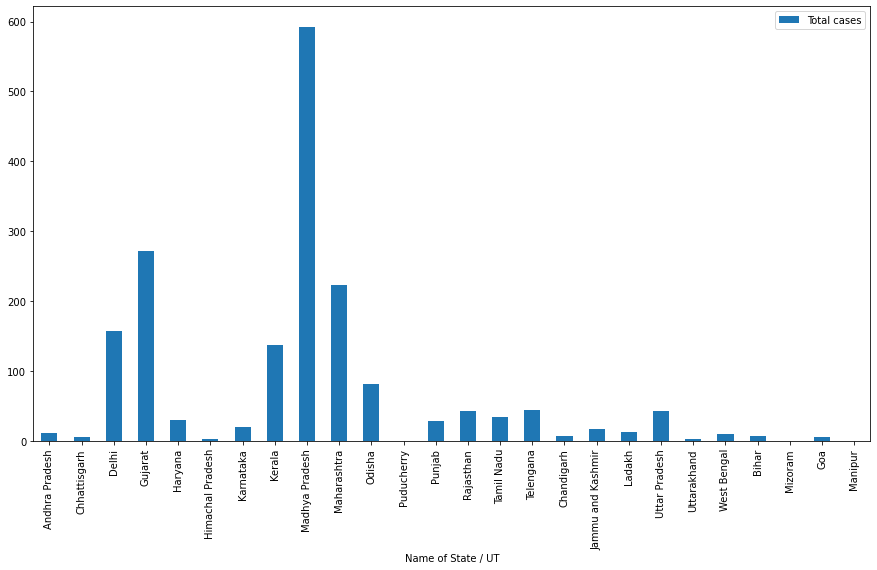

In [59]:
df.plot(kind = 'bar',x='Name of State / UT',y='Total cases')
plt.show()

<BarContainer object of 26 artists>

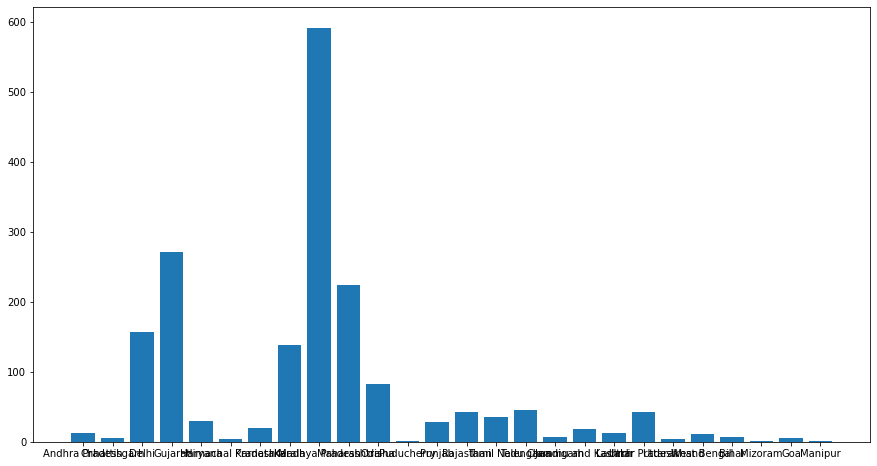

In [60]:
plt.bar(df['Name of State / UT'],df['Total cases'])

In [6]:
df.iplot(kind='bar',x='Name of State / UT',y='Total cases')


PlotlyRequestError: Authentication credentials were not provided.

In [79]:
fig = px.scatter(df,x='Name of State / UT',y='Total cases')

In [ ]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total cases')

In [63]:

df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

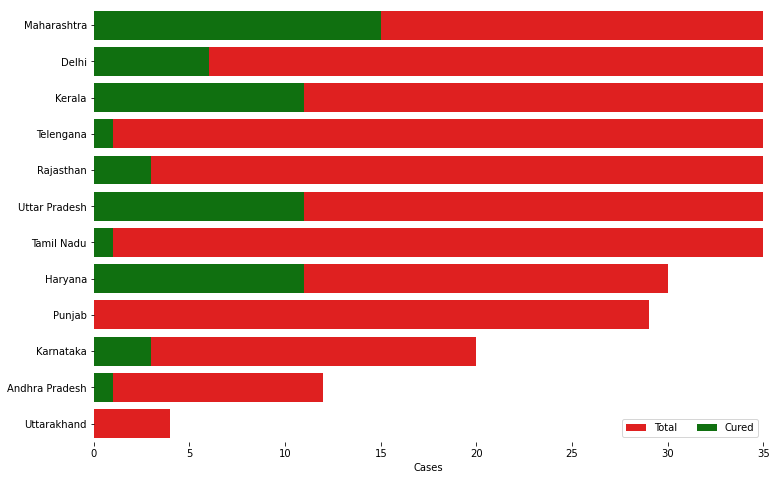

In [64]:

f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="green")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [68]:
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [85]:
dbd_India

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


In [ ]:
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{"colspan": 2}, None]], subplot_titles=("S.Korea","Italy", "India"))
fig.add_trace(go.Scatter(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'], marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")), 1, 1)
fig.add_trace(go.Scatter(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'], marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")), 1, 2)
fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total Cases'], marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")), 2, 1)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases")
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [24]:
df = pd.read_csv(r'C:\Users\BI121\Downloads\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_confirmed = pd.read_csv(r"C:\Users\BI121\Downloads\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv(r"C:\Users\BI121\Downloads\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv(r"C:\Users\BI121\Downloads\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\time_series_covid_19_deaths.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [26]:
df_deaths.head(20)

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.head(20)

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,2020-01-22 17:00:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,2020-01-22 17:00:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,2020-01-22 17:00:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0


In [29]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['SNo', 'Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,Hong Kong,13,0.0,0.0,0.0
1,01/22/2020,Macau,Macau,21,1.0,0.0,0.0
2,01/22/2020,Mainland China,Anhui,1,1.0,0.0,0.0
3,01/22/2020,Mainland China,Beijing,2,14.0,0.0,0.0
4,01/22/2020,Mainland China,Chongqing,3,6.0,0.0,0.0


In [30]:

df.query('Country=="India"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,2020-01-30 16:00:00,1.0,0.0,0.0
1,2020-01-31 08:15:00,1.0,0.0,0.0
2,2020-01-31 23:59:00,1.0,0.0,0.0
3,2020-02-02 06:03:08,2.0,0.0,0.0
4,2020-02-03 21:43:02,30.0,0.0,0.0
5,2020-02-13 18:53:02,9.0,0.0,0.0
6,2020-02-16 07:43:02,45.0,0.0,45.0
7,2020-03-02 22:33:09,10.0,0.0,6.0
8,2020-03-04 12:33:03,28.0,0.0,3.0
9,2020-03-05 13:53:03,30.0,0.0,3.0


In [31]:
df.groupby('Date').sum().head()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0


In [32]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

In [34]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

In [35]:
fig = px.density_mapbox(df_latlong, lat="Lat", lon="Long", hover_name="Province/State", hover_data=["Confirmed","Deaths","Recovered"], animation_frame="Date", color_continuous_scale="Portland", radius=7, zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered')
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()